In [2]:
#Load libraries
import os
import pandas as pd
import numpy as np  
from fancyimpute import KNN 
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir("C:/Users/levi0/Downloads")

In [4]:
os.getcwd()

'C:\\Users\\levi0\\Downloads'

In [5]:
loan_default = pd.read_csv("bank-loan.csv")

# DATA PRE-PROCESSING 

In [6]:
loan_default.head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


**MISSING VALUE ANALYSIS**

In [7]:
missing_val = pd.DataFrame(loan_default.isnull().sum())

In [8]:
missing_val

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,150


In [9]:
loan_default = loan_default.iloc[:-150]

In [10]:
missing_val = pd.DataFrame(loan_default.isnull().sum())

In [11]:
missing_val

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,0


<Figure size 360x360 with 0 Axes>

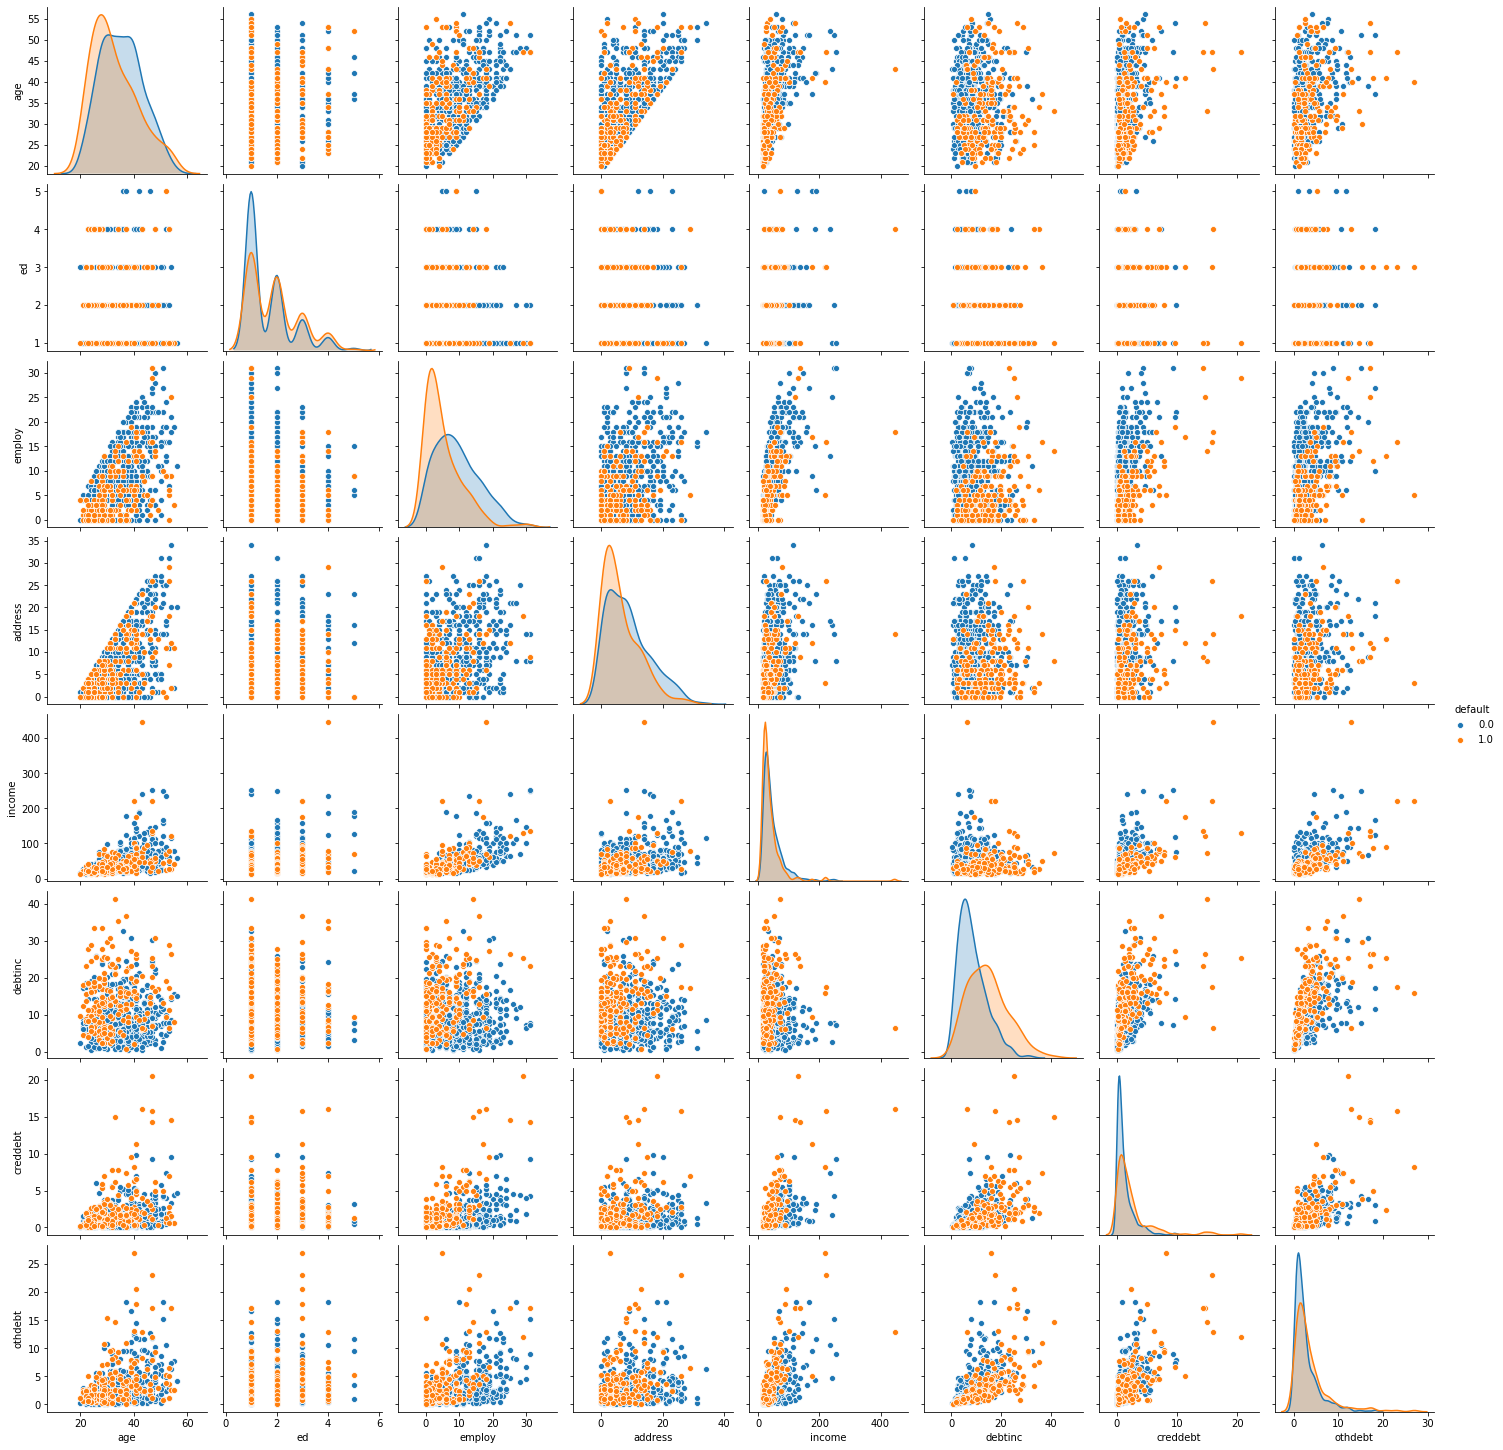

In [12]:
import seaborn as sns 
plt.figure(figsize=(5,5))
sns.pairplot(loan_default, hue='default')

In [13]:
loan_default.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


**OUTLIER ANALYSIS**

{'whiskers': [<matplotlib.lines.Line2D at 0x1fdc9cb1188>,
 'caps': [<matplotlib.lines.Line2D at 0x1fdc9de8c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fdc9c68548>],
 'medians': [<matplotlib.lines.Line2D at 0x1fdc9b9ffc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fdc9d57788>],
 'means': []}

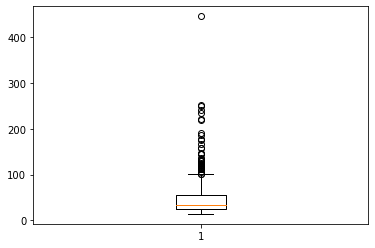

In [14]:
%matplotlib inline    
plt.boxplot(loan_default['income'])

In [15]:
#numerical variables stored separately 
cnames =  ["age", "employ", "address", "income", "debtinc", "creddebt", "othdebt"]

In [16]:
cnames

['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

In [17]:
#Detect and replace with NA


for i in cnames:
    print(i)
    q75, q25 = np.percentile(loan_default.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    loan_default.loc[loan_default[i] < min, i] = np.nan
    loan_default.loc[loan_default[i] > max, i] = np.nan

age
12.5
56.5
employ
-10.5
25.5
address
-10.5
25.5
income
-22.5
101.5
debtinc
-8.6875
27.8125
creddebt
-1.930284375
4.201298625
othdebt
-3.2741515000000003
8.2413945


At the location [80] for income, debtinc, creddebt and othdebt 

Actual value = 27, 23.1, 1.4, 3.44

Mean = 45, 10.7, 1.57, 3.07 

Median = 34, 8.7, 0.88, 2

KNN = 25, 5.7, 1.28, 1.17
Respectively

Thus the suitable method of imputation was chosen for each variable

In [18]:
loan_default['debtinc'] = loan_default['debtinc'].fillna(loan_default['debtinc'].mean())
loan_default['creddebt'] = loan_default['creddebt'].fillna(loan_default['creddebt'].mean())
loan_default['othdebt'] = loan_default['othdebt'].fillna(loan_default['othdebt'].mean())

In [19]:
loan_default = pd.DataFrame(KNN(k = 3).fit_transform(loan_default), columns = loan_default.columns)

Imputing row 1/700 with 1 missing, elapsed time: 0.096
Imputing row 101/700 with 1 missing, elapsed time: 0.097
Imputing row 201/700 with 0 missing, elapsed time: 0.098
Imputing row 301/700 with 2 missing, elapsed time: 0.099
Imputing row 401/700 with 0 missing, elapsed time: 0.100
Imputing row 501/700 with 0 missing, elapsed time: 0.101
Imputing row 601/700 with 0 missing, elapsed time: 0.102


In [20]:
loan_default.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.159794,8.004205,40.427181,9.813120,1.078174,2.366007,0.261429
std,7.997342,0.928206,6.241671,6.318983,20.926717,6.045422,0.910871,1.772441,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,53.000000,13.500000,1.486789,3.055199,1.000000
max,56.000000,5.000000,25.000000,25.000000,101.000000,27.700000,4.160000,8.217600,1.000000


In [21]:
#creating a dataset with only numerical variables for heatmap 
dt = loan_default
dt = dt.drop(['ed'], axis=1)

In [22]:
dt.head(3)

,age,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,17.0,12.0,59.491466,9.3,1.078174,5.008608,1.0
1,27.0,10.0,6.0,31.000000,17.3,1.362202,4.000798,0.0
2,40.0,15.0,14.0,55.000000,5.5,0.856075,2.168925,0.0


**FEATURE SELECTION**

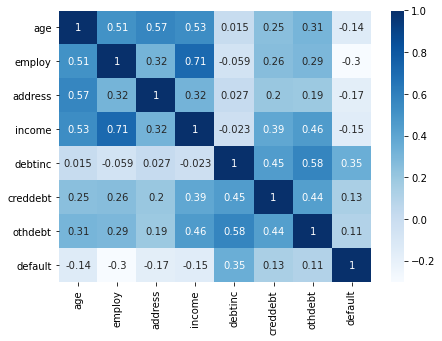

In [23]:
#Plotting heatmap 
plt.figure(figsize=(7,5))
sns.heatmap(dt.corr(), cmap='Blues', annot=True)

In [24]:
#We choose to drop income variable 
loan_default = loan_default.drop(['income'], axis=1)

(array([111.,  86.,  84.,  87.,  76.,  57.,  57.,  33.,  39.,  31.,  13.,
         19.,   7.]),
 array([ 0.        ,  1.92307692,  3.84615385,  5.76923077,  7.69230769,
         9.61538462, 11.53846154, 13.46153846, 15.38461538, 17.30769231,
        19.23076923, 21.15384615, 23.07692308, 25.        ]),
 <a list of 13 Patch objects>)

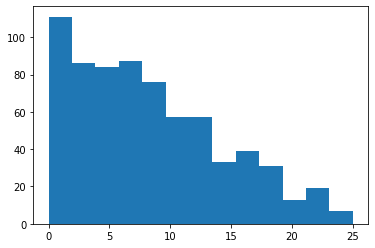

In [25]:
#Normality check
%matplotlib inline  
plt.hist(loan_default['employ'], bins='auto')

In [26]:
# A new set of continous variables after dropping income 
cnames =  ["age", "employ", "address", "debtinc", "creddebt", "othdebt"]

**FEATURE SCALING**

In [27]:
#Normalisation 

for i in cnames:
    print(i)
    loan_default[i] = (loan_default[i] - (loan_default[i].min()))/((loan_default[i].max()) - (loan_default[i].min()))

age
employ
address
debtinc
creddebt
othdebt


In [28]:
loan_default.head(5)

,age,ed,employ,address,debtinc,creddebt,othdebt,default
0,0.583333,3.0,0.68,0.48,0.326007,0.257088,0.607319,1.0
1,0.194444,1.0,0.40,0.24,0.619048,0.325556,0.483995,0.0
2,0.555556,1.0,0.60,0.56,0.186813,0.203548,0.259831,0.0
3,0.583333,1.0,0.60,0.56,0.091575,0.638098,0.094921,0.0
4,0.111111,2.0,0.08,0.00,0.619048,0.428064,0.368450,1.0


**CHECK FOR IMBALANCE**

Text(0, 0.5, 'FREQUENCY')

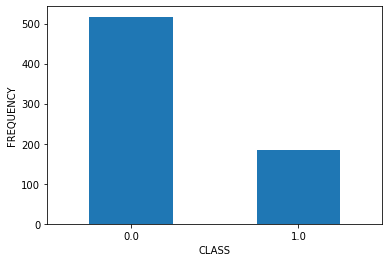

In [29]:
ct = pd.value_counts(loan_default['default'], sort = True)

ct.plot(kind = 'bar', rot=0)

plt.xlabel("CLASS")

plt.ylabel("FREQUENCY")

In [30]:
YesDefault = loan_default[loan_default['default']==1]

NoDefault = loan_default[loan_default['default']==0]

print(YesDefault.shape,NoDefault.shape)

(183, 8) (517, 8)


*Although there is imbalance in the data, it is not an extreme imbalance such as a 9:1 ratio so oversampling was initially avoided*

# MODEL DEVELOPMENT

**LOGISTIC REGRESSION**

In [31]:
loan_default_logit = pd.DataFrame(loan_default['default'])

In [32]:
loan_default_logit = loan_default_logit.join(loan_default[cnames])

In [33]:
cat_names = ["ed"]

for i in cat_names:
    temp = pd.get_dummies(loan_default[i], prefix = i)
    loan_default_logit = loan_default_logit.join(temp)

In [34]:
loan_default_logit.head(3)

,default,age,employ,address,debtinc,creddebt,othdebt,ed_1.0,ed_2.0,ed_3.0,ed_4.0,ed_5.0
0,1.0,0.583333,0.68,0.48,0.326007,0.257088,0.607319,0,0,1,0,0
1,0.0,0.194444,0.40,0.24,0.619048,0.325556,0.483995,1,0,0,0,0
2,0.0,0.555556,0.60,0.56,0.186813,0.203548,0.259831,1,0,0,0,0


In [35]:
Sample_Index = np.random.rand(len(loan_default_logit)) < 0.8

train = loan_default_logit[Sample_Index]
test = loan_default_logit[~Sample_Index]

In [36]:
train.shape

(570, 12)

In [37]:
train_cols = train.columns[1:12]

In [38]:
train_cols

Index(['age', 'employ', 'address', 'debtinc', 'creddebt', 'othdebt', 'ed_1.0',
       'ed_2.0', 'ed_3.0', 'ed_4.0', 'ed_5.0'],
      dtype='object')

In [39]:
import statsmodels.api as sm

logit = sm.Logit(train['default'], train[train_cols]).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.438302
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  570
Model:                          Logit   Df Residuals:                      559
Method:                           MLE   Df Model:                           10
Date:                Tue, 30 Jun 2020   Pseudo R-squ.:                  0.2419
Time:                        16:47:22   Log-Likelihood:                -249.83
converged:                       True   LL-Null:                       -329.54
Covariance Type:            nonrobust   LLR p-value:                 4.296e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            1.4576      0.682      2.137      0.033       0.121       2.794
employ        -4.6053      0.692     -6.659      0.000      -5.961      -3.250
address       -2.1138      0.611     -3.459      0.001      -3.311      -0.916
debtinc        4.0259      0.681      5.911      0.000       2.691       5.361
creddebt       0.6624      0.622      1.065      0.287      -0.557       1.882
othdebt        0.0292      0.682      0.043      0.966      -1.308       1.366
ed_1.0        -1.6958      0.329     -5.160      0.000      -2.340      -1.052
ed_2.0        -1.4234      0.329     -4.330      0.000      -2.068      -0.779
ed_3.0        -1.1373      0.405     -2.811      0.005      -1.930      -0.344
ed_4.0        -1.4772      0.496     -2.979      0.003      -2.449      -0.505
ed_5.0        -0.9900      1.336     -0.741      0.459      -3.609       1.629
==============================================================================
"""

In [40]:
test['Actual_prob'] = logit.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.4, 'ActualVal'] = 0

In [41]:
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [42]:
X = loan_default.values[:, 0:7]
Y = loan_default.values[:,7]

In [43]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

**DECISION TREE**

In [44]:
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

C50_Predictions = C50_model.predict(X_test)

**RANDOM FOREST**

In [45]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)

threshold = 0.4

rfp = RF_model.predict_proba(X_test)

RF_Predictions = (rfp[:,1] >= threshold).astype('int')

**KNN IMPLEMENTATION**

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
x1 = loan_default[['age', 'ed', 'employ', 'address', 'debtinc', 'creddebt', 'othdebt']]
y1 = loan_default[['default']]
x2 = loan_default_logit[['age', 'employ', 'address', 'debtinc', 'creddebt', 'othdebt', 'ed_1.0', 'ed_2.0', 'ed_3.0', 'ed_4.0']]
y2 = loan_default_logit[['default']]

In [48]:
acc_rate = []

for i in range(1,30):
    
    KNN_model1 = KNeighborsClassifier(n_neighbors=i)
    cvscore=cross_val_score(KNN_model1,x1,y1,cv=10)
    acc_rate.append(cvscore.mean())

Text(0, 0.5, 'Accuracy ')

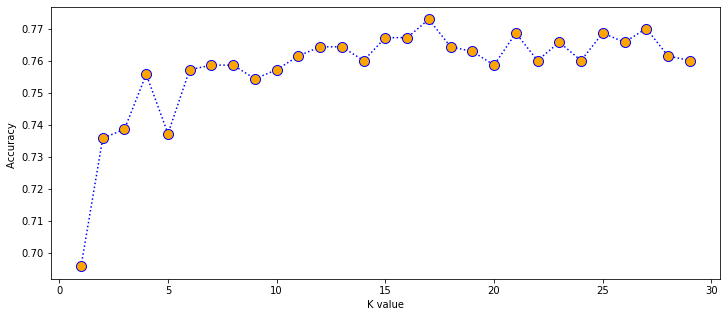

In [49]:
plt.figure(figsize=(12,5))
plt.plot(range(1,30),acc_rate,color='blue', linestyle=':', marker='o',
         markerfacecolor='orange', markersize=10)
plt.xlabel('K value')
plt.ylabel('Accuracy ')

In [50]:
from sklearn.metrics import recall_score
recall = []

for i in range(1,30):
    
    KNN_model1 = KNeighborsClassifier(n_neighbors=i)
    KNN_model1.fit(X_train, y_train)
    kpred = KNN_model1.predict(X_test)
    rscore=recall_score(y_test, kpred, average=None)
    recall.append(rscore.mean())

Text(0, 0.5, 'Recall ')

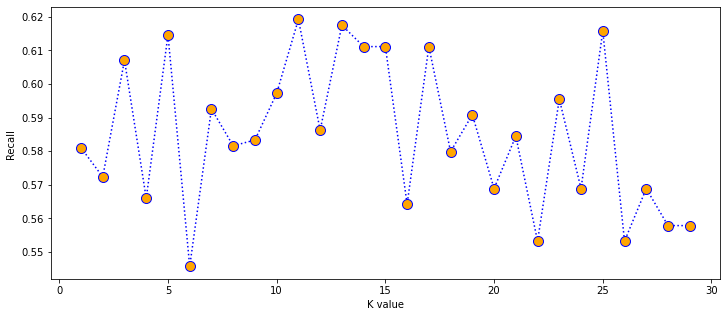

In [51]:
plt.figure(figsize=(12,5))
plt.plot(range(1,30),recall,color='blue', linestyle=':', marker='o',
         markerfacecolor='orange', markersize=10)
plt.xlabel('K value')
plt.ylabel('Recall ')

In [52]:
KNN_model = KNeighborsClassifier(n_neighbors = 17).fit(X_train, y_train)

threshold = 0.4

kbp = KNN_model.predict_proba(X_test)

KNN_Predictions = (kbp[:,1] >= threshold).astype('int')

**NAIVE'S BAYE**

In [53]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB().fit(X_train, y_train)

threshold = 0.4

nbp = NB_model.predict_proba(X_test)

NB_Predictions = (nbp[:,1] >= threshold).astype('int')

# MODEL ANALYSIS

In [72]:
 CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [73]:
CM

col_0,0.0,1.0
row_0,,
0.0,90,18
1.0,20,12


In [74]:
#check accuracy of models
((TP+TN)*100)/(TP+TN+FP+FN)

72.85714285714286

In [75]:
#False Negative rate 
(FN*100)/(FN+TP)

62.5

**PLOTTING ROC CURVES**

In [76]:
#Probabilities
C50_Prob = C50_model.predict_proba(X_test)
C50_Prob = C50_Prob[:, 1]
RF_Prob = RF_model.predict_proba(X_test)
RF_Prob = RF_Prob[:, 1]
NB_Prob = NB_model.predict_proba(X_test)
NB_Prob = NB_Prob[:, 1]
KNN_Prob = KNN_model.predict_proba(X_test)
KNN_Prob = KNN_Prob[:, 1]

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score

In [78]:
#auc calculation 
aucLR = roc_auc_score(test['default'], test['Actual_prob'])
aucC50 = roc_auc_score(y_test, C50_Prob)
aucRF = roc_auc_score(y_test, RF_Prob)
aucNB = roc_auc_score(y_test, NB_Prob)
aucKNN = roc_auc_score(y_test, KNN_Prob)

In [79]:
fprLR, tprLR, thresholds = roc_curve(test['default'], test['Actual_prob'], pos_label=1)
fprC50, tprC50, thresholds = roc_curve(y_test, C50_Prob, pos_label=1)
fprRF, tprRF, thresholds = roc_curve(y_test, RF_Prob, pos_label=1)
fprNB, tprNB, thresholds = roc_curve(y_test, NB_Prob, pos_label=1)
fprKNN, tprKNN, thresholds = roc_curve(y_test, KNN_Prob, pos_label=1)

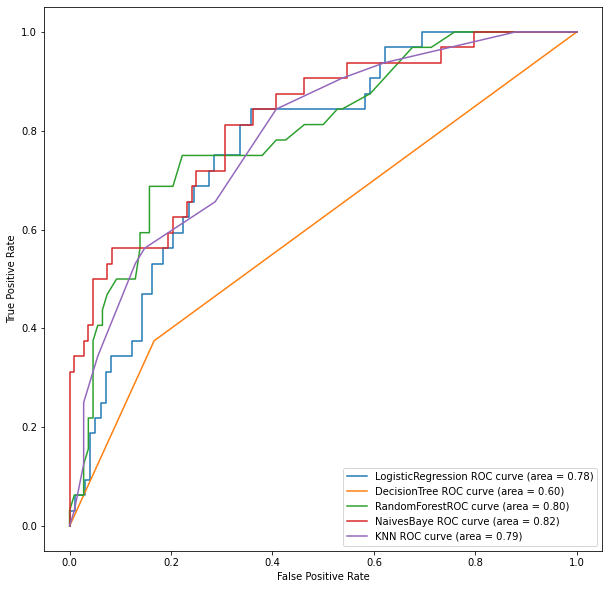

In [81]:
plt.figure(figsize=(10,10))
plt.plot(fprLR, tprLR, label='LogisticRegression ROC curve (area = %0.2f)' %aucLR)
plt.plot(fprC50, tprC50, label='DecisionTree ROC curve (area = %0.2f)' %aucC50)
plt.plot(fprRF, tprRF, label='RandomForestROC curve (area = %0.2f)' %aucRF)
plt.plot(fprNB, tprNB, label='NaivesBaye ROC curve (area = %0.2f)' %aucNB)
plt.plot(fprKNN, tprKNN, label='KNN ROC curve (area = %0.2f)' %aucKNN)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [82]:
from sklearn.metrics import average_precision_score
APscore_LR = average_precision_score(test['default'], test['ActualVal'], pos_label=1)
APscore_C50 = average_precision_score(y_test, C50_Predictions, pos_label=1)
APscore_RF = average_precision_score(y_test, RF_Predictions, pos_label=1)
APscore_KNN = average_precision_score(y_test, KNN_Predictions, pos_label=1)
APscore_NB = average_precision_score(y_test, NB_Predictions, pos_label=1)

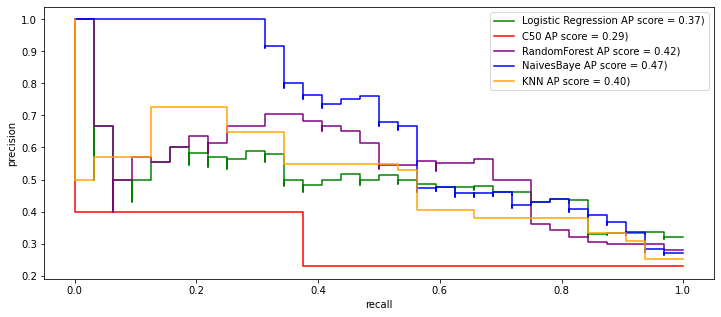

In [83]:
plt.figure(figsize=(12,5))
precision1, recall1, _ = precision_recall_curve(test['default'], test['Actual_prob'], pos_label=1)
precision2, recall2, _ = precision_recall_curve(y_test, C50_Prob, pos_label=1)
precision3, recall3, _ = precision_recall_curve(y_test, RF_Prob, pos_label=1)
precision4, recall4, _ = precision_recall_curve(y_test, NB_Prob, pos_label=1)
precision5, recall5, _ = precision_recall_curve(y_test, KNN_Prob, pos_label=1)
plt.step(recall1, precision1, color='green', where='post', label='Logistic Regression AP score = %0.2f)' %APscore_LR)
plt.step(recall2, precision2, color='red', where='post', label='C50 AP score = %0.2f)' %APscore_C50)
plt.step(recall3, precision3, color='purple', where='post', label='RandomForest AP score = %0.2f)' %APscore_RF)
plt.step(recall4, precision4, color='blue', where='post', label='NaivesBaye AP score = %0.2f)' %APscore_NB)
plt.step(recall5, precision5, color='orange', where='post', label='KNN AP score = %0.2f)' %APscore_KNN)
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.savefig('pOCFiasd.png')

# OVERSAMPLING 

In [84]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=35)
X_res,y_res=smk.fit_sample(X,Y)

In [85]:
print(X_res.shape,y_res.shape)

(998, 7) (998,)


In [86]:
X = X_res
Y = y_res

In [87]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [88]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state=0).fit(X_train, y_train)

threshold = 0.4

lrp = LR_model.predict_proba(X_test)

LR_Predictions = (lrp[:,1] >= threshold).astype('int')

In [89]:
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

C50_Predictions = C50_model.predict(X_test)

In [120]:
RF_model = RandomForestClassifier(n_estimators = 500).fit(X_train, y_train)

threshold = 0.4

rfp = RF_model.predict_proba(X_test)

RF_Predictions = (rfp[:,1] >= threshold).astype('int')

In [91]:
KNN_model = KNeighborsClassifier(n_neighbors = 17).fit(X_train, y_train)

threshold = 0.4

kbp = KNN_model.predict_proba(X_test)

KNN_Predictions = (kbp[:,1] >= threshold).astype('int')

In [92]:
NB_model = GaussianNB().fit(X_train, y_train)

threshold = 0.4

nbp = NB_model.predict_proba(X_test)

NB_Predictions = (nbp[:,1] >= threshold).astype('int')

In [127]:
 CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [128]:
CM

col_0,0,1
row_0,,
0.0,68,19
1.0,10,103


In [129]:
#check accuracy of models
((TP+TN)*100)/(TP+TN+FP+FN)

85.5

In [130]:
#False Negative rate 
(FN*100)/(FN+TP)

8.849557522123893

**STABILITY CHECK**

In [131]:
print(cross_val_score(RF_model, x1, y1, cv=20, scoring ='accuracy').mean())

0.7842857142857144


In [132]:
print(cross_val_score(KNN_model, x1, y1, cv=20, scoring ='accuracy').mean())

0.7714285714285715


# FINAL COMPARISON 

*A final comparison between Random Forest and KNN was made as they performed really well*

In [133]:
RF_Prob = RF_model.predict_proba(X_test)
RF_Prob = RF_Prob[:, 1]
KNN_Prob = KNN_model.predict_proba(X_test)
KNN_Prob = KNN_Prob[:, 1]

In [134]:
fprRF, tprRF, thresholds = roc_curve(y_test, RF_Prob, pos_label=1)
fprKNN, tprKNN, thresholds = roc_curve(y_test, KNN_Prob, pos_label=1)

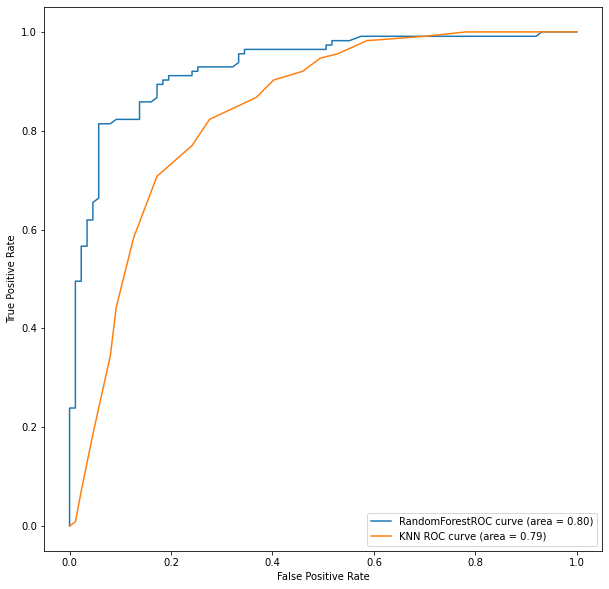

In [135]:
plt.figure(figsize=(10,10))
plt.plot(fprRF, tprRF, label='RandomForestROC curve (area = %0.2f)' %aucRF)
plt.plot(fprKNN, tprKNN, label='KNN ROC curve (area = %0.2f)' %aucKNN)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('ROCcomp.png')

In [136]:
APscore_RF = average_precision_score(y_test, RF_Predictions, pos_label=1)
APscore_KNN = average_precision_score(y_test, KNN_Predictions, pos_label=1)

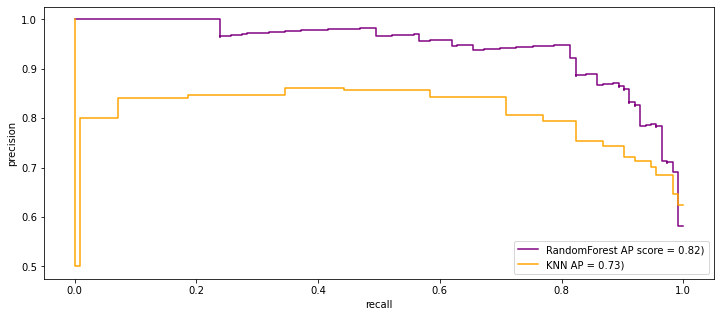

In [137]:
plt.figure(figsize=(12,5))
precision3, recall3, _ = precision_recall_curve(y_test, RF_Prob, pos_label=1)
precision5, recall5, _ = precision_recall_curve(y_test, KNN_Prob, pos_label=1)
plt.step(recall3, precision3, color='purple', where='post', label='RandomForest AP score = %0.2f)' %APscore_RF)
plt.step(recall5, precision5, color='orange', where='post', label='KNN AP = %0.2f)' %APscore_KNN)
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.savefig('PRcomp.png')